**Vamos experimentar agora a Rede Neural Artificial?**
Veja:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html# 

In [82]:
!pip -q install yellowbrick

You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.neural_network import MLPClassifier

In [84]:
#from google.colab import drive
#drive.mount('/content/drive')

In [85]:
#novos pre-processamentos

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# Carregando o dataset
path = '/Users/caiolima/Documents/inteligência artificial/lista 7/breast-cancer.csv'
dataFrame = pd.read_csv(path)

# Separando características e rótulo
X = dataFrame.iloc[:, :-1]
y = dataFrame.iloc[:, -1]

# Identificação e tratamento de outliers - exemplo usando Z-score
from scipy import stats
z_scores = np.abs(stats.zscore(X.select_dtypes(include=[np.number])))
outlier_rows = np.where(z_scores > 3)[0]
X = X.drop(outlier_rows)
y = y.drop(outlier_rows)

# Conversão de variáveis nominais para numéricas
# Vamos assumir que X possui algumas colunas categóricas. Identifique essas colunas e as transforme.
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=[np.number]).columns

# Criação de transformadores para colunas numéricas e categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Preenchimento de valores faltantes para numéricos
    ('scaler', StandardScaler())  # Normalização de características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preenchimento de valores faltantes para categóricos
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Conversão de categóricos para numéricos
])

# Combinando os transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicando o pré-processamento
X = preprocessor.fit_transform(X)

# Balanceamento do dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Eliminação de redundância (se necessário, usando por exemplo, eliminação recursiva de características)

# Agora dividimos o conjunto de dados já pré-processado em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Vamos treinar com a rede neural?**

**Experimente a RNA com os parâmetros default. A rede convergiu? quantas épocas?**

In [86]:
from sklearn.model_selection import GridSearchCV

# Definição do espaço de hiperparâmetros para a busca
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (10, 10), (20, 10), (30, 15)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],  # Regularização L2
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}


# Criando o objeto Grid Search com o modelo MLPClassifier e o espaço de hiperparâmetros
grid_search = GridSearchCV(MLPClassifier(max_iter=2000), param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Executando o Grid Search no conjunto de dados de treino
grid_search.fit(X_treino, y_treino)

# Imprimindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados pelo Grid Search:")
print(grid_search.best_params_)

best_params = grid_search.best_params_
best_model = MLPClassifier(
    max_iter=2000,  # Aumentar se necessário
    **best_params # Desempacota os melhores parâmetros encontrados
)
best_model.fit(X_treino, y_treino)

# Avaliando o melhor modelo encontrado no conjunto de teste
best_model = grid_search.best_estimator_
previsoes = best_model.predict(X_teste)
acuracia = accuracy_score(y_teste, previsoes)
print(f"Acurácia do melhor modelo: {acuracia}")


modelo = MLPClassifier(
    max_iter=2000,  # Aumentando o número de iterações
    learning_rate_init=0.005,  # Ajustando a taxa de aprendizado
    solver='adam',  # Garantindo que estamos usando o otimizador 'adam'
    verbose=True  # Para imprimir mensagens durante o treinamento
)

modelo.fit(X_treino, y_treino)

/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

**Depois execute novamente com os ajustes. Veja agora os erros a cada época.. estabeleça o verbose para true **

In [87]:
modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.69577205
Iteration 2, loss = 0.68066804
Iteration 3, loss = 0.66872945
Iteration 4, loss = 0.65669064
Iteration 5, loss = 0.64677642
Iteration 6, loss = 0.63753823
Iteration 7, loss = 0.62851702
Iteration 8, loss = 0.62098742
Iteration 9, loss = 0.61366021
Iteration 10, loss = 0.60701451
Iteration 11, loss = 0.60068516
Iteration 12, loss = 0.59486090
Iteration 13, loss = 0.58920706
Iteration 14, loss = 0.58400559
Iteration 15, loss = 0.57962014
Iteration 16, loss = 0.57469789
Iteration 17, loss = 0.57019631
Iteration 18, loss = 0.56630702
Iteration 19, loss = 0.56244514
Iteration 20, loss = 0.55883408
Iteration 21, loss = 0.55603194
Iteration 22, loss = 0.55194066
Iteration 23, loss = 0.54880242
Iteration 24, loss = 0.54563843
Iteration 25, loss = 0.54272236
Iteration 26, loss = 0.53970141
Iteration 27, loss = 0.53667165
Iteration 28, loss = 0.53363884
Iteration 29, loss = 0.53074274
Iteration 30, loss = 0.52795635
Iteration 31, loss = 0.52501574
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

**Faça outras alterações nos parâmetros**

**4 entradas - 3 neurônios - 3 neurônios - 1**

**Veja SoftMax para problemas multiclasse**

In [88]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.72428564
Iteration 2, loss = 0.70977052
Iteration 3, loss = 0.69622148
Iteration 4, loss = 0.68423722
Iteration 5, loss = 0.67276470
Iteration 6, loss = 0.66133967
Iteration 7, loss = 0.65213307
Iteration 8, loss = 0.64332841
Iteration 9, loss = 0.63452488
Iteration 10, loss = 0.62665851
Iteration 11, loss = 0.61941389
Iteration 12, loss = 0.61196504
Iteration 13, loss = 0.60567699
Iteration 14, loss = 0.60003480
Iteration 15, loss = 0.59428738
Iteration 16, loss = 0.58936019
Iteration 17, loss = 0.58432294
Iteration 18, loss = 0.58023525
Iteration 19, loss = 0.57585260
Iteration 20, loss = 0.57182667
Iteration 21, loss = 0.56824894
Iteration 22, loss = 0.56483110
Iteration 23, loss = 0.56148882
Iteration 24, loss = 0.55805156
Iteration 25, loss = 0.55465156
Iteration 26, loss = 0.55152987
Iteration 27, loss = 0.54854140
Iteration 28, loss = 0.54541969
Iteration 29, loss = 0.54252787
Iteration 30, loss = 0.53976601
Iteration 31, loss = 0.53685147
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)



> **Vamos testar o modelo?**



In [89]:
previsoes = modelo.predict(X_teste)

In [90]:
previsoes

array(['no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'recurrence-events', 'recurrence-events',
       'recurrence-events', 'recurrence-events', 'no-recurrence-events',
      



> **Será se o modelo acertou?**



In [91]:
y_teste

285    no-recurrence-events
281    no-recurrence-events
33     no-recurrence-events
211       recurrence-events
93     no-recurrence-events
               ...         
228    no-recurrence-events
371       recurrence-events
176    no-recurrence-events
272    no-recurrence-events
3      no-recurrence-events
Name: Class, Length: 81, dtype: object

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.8024691358024691

In [93]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[35, 12],
       [ 4, 30]])

0.8024691358024691

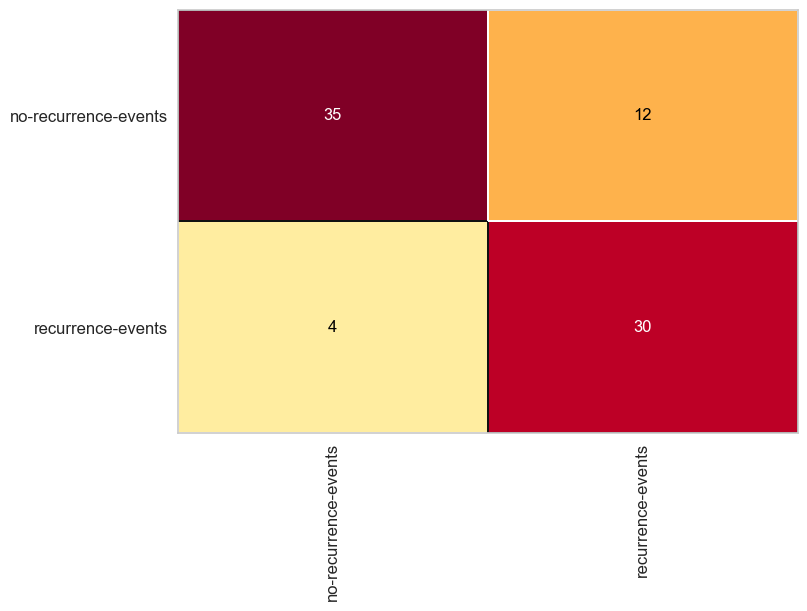

In [94]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [95]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.90      0.74      0.81        47
   recurrence-events       0.71      0.88      0.79        34

            accuracy                           0.80        81
           macro avg       0.81      0.81      0.80        81
        weighted avg       0.82      0.80      0.80        81



In [96]:
#avaliação do desempenho do modelo a partir de diferentes topologias
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def avaliar_topologia(X_treino, y_treino, X_teste, y_teste, topologia):
    print(f"Avaliando topologia: {topologia}")
    modelo = MLPClassifier(hidden_layer_sizes=topologia, max_iter=1000, verbose=True)
    modelo.fit(X_treino, y_treino)
    previsoes = modelo.predict(X_teste)
    
    acuracia = accuracy_score(y_teste, previsoes)
    relatorio = classification_report(y_teste, previsoes)
    
    print(f"Acurácia: {acuracia}")
    print(relatorio)
    print(confusion_matrix(y_teste, previsoes))
    print("\n" + "-"*80 + "\n")

# Lista de topologias a serem avaliadas
topologias = [
    
    (10,), (20,), (30,), (10, 5), (20, 10), (30, 15) # 1 camada oculta com 20 neurônios
    # ... Adicione mais topologias conforme necessário
]

# Avaliação de cada topologia
for topologia in topologias:
    avaliar_topologia(X_treino, y_treino, X_teste, y_teste, topologia)


Avaliando topologia: (10,)
Iteration 1, loss = 0.85479268
Iteration 2, loss = 0.84043792
Iteration 3, loss = 0.82646737
Iteration 4, loss = 0.81281406
Iteration 5, loss = 0.79931584
Iteration 6, loss = 0.78776728
Iteration 7, loss = 0.77451301
Iteration 8, loss = 0.76314419
Iteration 9, loss = 0.75275122
Iteration 10, loss = 0.74207070
Iteration 11, loss = 0.73312098
Iteration 12, loss = 0.72379119
Iteration 13, loss = 0.71532931
Iteration 14, loss = 0.70708671
Iteration 15, loss = 0.69956669
Iteration 16, loss = 0.69309677
Iteration 17, loss = 0.68621720
Iteration 18, loss = 0.68079641
Iteration 19, loss = 0.67528331
Iteration 20, loss = 0.67019230
Iteration 21, loss = 0.66594240
Iteration 22, loss = 0.66158883
Iteration 23, loss = 0.65745465
Iteration 24, loss = 0.65422283
Iteration 25, loss = 0.65066251
Iteration 26, loss = 0.64789573
Iteration 27, loss = 0.64513553
Iteration 28, loss = 0.64225979
Iteration 29, loss = 0.63979957
Iteration 30, loss = 0.63765722
Iteration 31, loss = 0

/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 446, loss = 0.25815869
Iteration 447, loss = 0.25782542
Iteration 448, loss = 0.25730677
Iteration 449, loss = 0.25681139
Iteration 450, loss = 0.25640101
Iteration 451, loss = 0.25610427
Iteration 452, loss = 0.25548612
Iteration 453, loss = 0.25503578
Iteration 454, loss = 0.25459066
Iteration 455, loss = 0.25416411
Iteration 456, loss = 0.25373715
Iteration 457, loss = 0.25336008
Iteration 458, loss = 0.25279344
Iteration 459, loss = 0.25232814
Iteration 460, loss = 0.25191130
Iteration 461, loss = 0.25148090
Iteration 462, loss = 0.25097238
Iteration 463, loss = 0.25060942
Iteration 464, loss = 0.25016519
Iteration 465, loss = 0.24986474
Iteration 466, loss = 0.24933656
Iteration 467, loss = 0.24889575
Iteration 468, loss = 0.24846422
Iteration 469, loss = 0.24796802
Iteration 470, loss = 0.24761033
Iteration 471, loss = 0.24714664
Iteration 472, loss = 0.24675087
Iteration 473, loss = 0.24625833
Iteration 474, loss = 0.24588124
Iteration 475, loss = 0.24549899
Iteration 

/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 386, loss = 0.17969281
Iteration 387, loss = 0.17905956
Iteration 388, loss = 0.17854760
Iteration 389, loss = 0.17813745
Iteration 390, loss = 0.17750534
Iteration 391, loss = 0.17701245
Iteration 392, loss = 0.17639533
Iteration 393, loss = 0.17585642
Iteration 394, loss = 0.17536626
Iteration 395, loss = 0.17489158
Iteration 396, loss = 0.17427739
Iteration 397, loss = 0.17383154
Iteration 398, loss = 0.17327413
Iteration 399, loss = 0.17276652
Iteration 400, loss = 0.17227101
Iteration 401, loss = 0.17182408
Iteration 402, loss = 0.17118747
Iteration 403, loss = 0.17068106
Iteration 404, loss = 0.17046515
Iteration 405, loss = 0.16979126
Iteration 406, loss = 0.16928291
Iteration 407, loss = 0.16869984
Iteration 408, loss = 0.16827615
Iteration 409, loss = 0.16775497
Iteration 410, loss = 0.16725271
Iteration 411, loss = 0.16675521
Iteration 412, loss = 0.16626622
Iteration 413, loss = 0.16575311
Iteration 414, loss = 0.16521894
Iteration 415, loss = 0.16505129
Iteration 

/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 256, loss = 0.35658834
Iteration 257, loss = 0.35529784
Iteration 258, loss = 0.35409883
Iteration 259, loss = 0.35284953
Iteration 260, loss = 0.35167044
Iteration 261, loss = 0.35051632
Iteration 262, loss = 0.34917422
Iteration 263, loss = 0.34812350
Iteration 264, loss = 0.34697576
Iteration 265, loss = 0.34601310
Iteration 266, loss = 0.34474959
Iteration 267, loss = 0.34367589
Iteration 268, loss = 0.34245600
Iteration 269, loss = 0.34118073
Iteration 270, loss = 0.34034757
Iteration 271, loss = 0.33902440
Iteration 272, loss = 0.33787663
Iteration 273, loss = 0.33700449
Iteration 274, loss = 0.33589949
Iteration 275, loss = 0.33490942
Iteration 276, loss = 0.33370144
Iteration 277, loss = 0.33269649
Iteration 278, loss = 0.33165524
Iteration 279, loss = 0.33055179
Iteration 280, loss = 0.32958164
Iteration 281, loss = 0.32842085
Iteration 282, loss = 0.32748742
Iteration 283, loss = 0.32642615
Iteration 284, loss = 0.32545534
Iteration 285, loss = 0.32453773
Iteration 

/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 119, loss = 0.39848128
Iteration 120, loss = 0.39666010
Iteration 121, loss = 0.39472911
Iteration 122, loss = 0.39282888
Iteration 123, loss = 0.39068969
Iteration 124, loss = 0.38848855
Iteration 125, loss = 0.38641040
Iteration 126, loss = 0.38437923
Iteration 127, loss = 0.38224743
Iteration 128, loss = 0.38028960
Iteration 129, loss = 0.37825269
Iteration 130, loss = 0.37602649
Iteration 131, loss = 0.37416376
Iteration 132, loss = 0.37191379
Iteration 133, loss = 0.36994773
Iteration 134, loss = 0.36790274
Iteration 135, loss = 0.36574506
Iteration 136, loss = 0.36379416
Iteration 137, loss = 0.36151464
Iteration 138, loss = 0.35931970
Iteration 139, loss = 0.35755650
Iteration 140, loss = 0.35533815
Iteration 141, loss = 0.35318417
Iteration 142, loss = 0.35088092
Iteration 143, loss = 0.34877155
Iteration 144, loss = 0.34677567
Iteration 145, loss = 0.34473635
Iteration 146, loss = 0.34256713
Iteration 147, loss = 0.34035384
Iteration 148, loss = 0.33802748
Iteration 

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
#relação do parâmetro taxa de aprendizado com quantidade de épocas
# Taxas de aprendizado e números de épocas para avaliação
learning_rates = [0.001, 0.01, 0.1, 0.2]
epochs = [200, 400, 600, 800, 1000]

# Avaliação das combinações
for lr in learning_rates:
    for epoch in epochs:
        print(f"Avaliando modelo com taxa de aprendizado {lr} e {epoch} épocas...")
        modelo = MLPClassifier(
            hidden_layer_sizes=(10,), 
            max_iter=epoch, 
            learning_rate_init=lr, 
            verbose=False
        )
        
        modelo.fit(X_treino, y_treino)
        previsoes = modelo.predict(X_teste)
        acuracia = accuracy_score(y_teste, previsoes)
        print(f"Acurácia: {acuracia}\n")
        # Aqui você pode adicionar mais métricas ou visualizações conforme necessário

# Pode-se também querer plotar as curvas de aprendizado


Avaliando modelo com taxa de aprendizado 0.001 e 200 épocas...
Acurácia: 0.6049382716049383

Avaliando modelo com taxa de aprendizado 0.001 e 400 épocas...


/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.6666666666666666

Avaliando modelo com taxa de aprendizado 0.001 e 600 épocas...


/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.691358024691358

Avaliando modelo com taxa de aprendizado 0.001 e 800 épocas...


/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.6666666666666666

Avaliando modelo com taxa de aprendizado 0.001 e 1000 épocas...


/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.654320987654321

Avaliando modelo com taxa de aprendizado 0.01 e 200 épocas...
Acurácia: 0.7283950617283951

Avaliando modelo com taxa de aprendizado 0.01 e 400 épocas...


/Users/caiolima/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.7530864197530864

Avaliando modelo com taxa de aprendizado 0.01 e 600 épocas...
Acurácia: 0.8271604938271605

Avaliando modelo com taxa de aprendizado 0.01 e 800 épocas...
Acurácia: 0.7407407407407407

Avaliando modelo com taxa de aprendizado 0.01 e 1000 épocas...
Acurácia: 0.7160493827160493

Avaliando modelo com taxa de aprendizado 0.1 e 200 épocas...
Acurácia: 0.691358024691358

Avaliando modelo com taxa de aprendizado 0.1 e 400 épocas...
Acurácia: 0.691358024691358

Avaliando modelo com taxa de aprendizado 0.1 e 600 épocas...
Acurácia: 0.6790123456790124

Avaliando modelo com taxa de aprendizado 0.1 e 800 épocas...
Acurácia: 0.7037037037037037

Avaliando modelo com taxa de aprendizado 0.1 e 1000 épocas...
Acurácia: 0.7037037037037037

Avaliando modelo com taxa de aprendizado 0.2 e 200 épocas...
Acurácia: 0.6666666666666666

Avaliando modelo com taxa de aprendizado 0.2 e 400 épocas...
Acurácia: 0.6296296296296297

Avaliando modelo com taxa de aprendizado 0.2 e 600 épocas

**Veja como implementar o backpropagation em python:**
https://www.askpython.com/python/examples/backpropagation-in-python
https://www.deeplearningbook.com.br/algoritmo-backpropagation-em-python/
